In [88]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
matplotlib.rc("font", family = "Malgun Gothic")
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
matplotlib.rc("font", family = "Malgun Gothic")
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df_raw = pd.read_csv("HMEQ.csv")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [5]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
df_train, df_test = train_test_split(df_raw,
                               test_size = 0.3,
                               random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (2623, 13)
test data size: (1125, 13)


In [11]:
log_model = Logit.from_formula("""BAD ~ LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_train)
log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.228666
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2355
Model:                          Logit   Df Residuals:                     2338
Method:                           MLE   Df Model:                           16
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                  0.2467
Time:                        21:19:39   Log-Likelihood:                -538.51
converged:                       True   LL-Null:                       -714.90
Covariance Type:            nonrobust   LLR p-value:                 2.710e-65
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.3390      0.605     -8.821      0.000      -6.525      -4.153

In [12]:
y_pred = log_result.predict(df_test)
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head

<bound method NDFrame.head of 1721    0
822     0
1686    0
789     0
165     0
       ..
2852    0
895     0
2775    0
2726    0
2624    0
Length: 1125, dtype: int32>

In [16]:
print("Accuracy:{0:3f}\n".format(accuracy_score(df_test["BAD"], y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test["BAD"], y_pred_class)))

Accuracy:0.921778

Confusion Matrix:
[[1016    5]
 [  83   21]]


C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


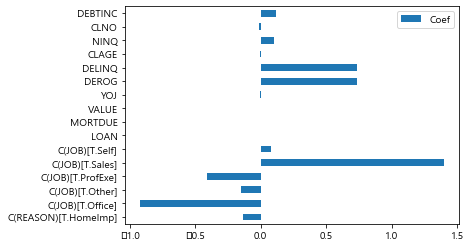

In [19]:
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

In [23]:
df_char = df_raw.select_dtypes(include = 'object')
df_numeric = df_raw.select_dtypes(exclude = 'object')

scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns = df_numeric.columns)
df_scaled = pd.concat([df_numeric_scaled, df_char], axis = 1)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,3.140664,-1.559587,-0.993626,-1.222620,-0.017076,-0.267462,-0.341184,-0.962555,-0.018635,-1.428350,0.356347,HomeImp,Other
1,3.140664,-1.550817,-1.039240,-1.172701,0.244826,-0.267462,-0.341184,-1.116501,-0.661630,-1.428350,0.329025,HomeImp,Other
2,-0.318404,-1.506968,0.607570,0.260485,-0.933731,-0.267462,-0.341184,-1.089512,-0.661630,-0.905133,-0.303684,HomeImp,Office
3,3.140664,-1.498198,-0.897428,-1.091090,0.375777,-0.267462,-0.341184,-1.338025,-0.018635,-0.067985,0.493725,HomeImp,Mgr
4,-0.318404,-1.498198,0.520156,0.191363,-0.671830,-0.267462,-0.341184,-1.055338,-0.661630,-0.905133,-0.531456,HomeImp,Office


In [24]:
df_scaled["BAD"] = np.where(df_scaled["BAD"] > 0, 1, 0)
df_scaled.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON,JOB
0,1,-1.559587,-0.993626,-1.222620,-0.017076,-0.267462,-0.341184,-0.962555,-0.018635,-1.428350,0.356347,HomeImp,Other
1,1,-1.550817,-1.039240,-1.172701,0.244826,-0.267462,-0.341184,-1.116501,-0.661630,-1.428350,0.329025,HomeImp,Other
2,0,-1.506968,0.607570,0.260485,-0.933731,-0.267462,-0.341184,-1.089512,-0.661630,-0.905133,-0.303684,HomeImp,Office
3,1,-1.498198,-0.897428,-1.091090,0.375777,-0.267462,-0.341184,-1.338025,-0.018635,-0.067985,0.493725,HomeImp,Mgr
4,0,-1.498198,0.520156,0.191363,-0.671830,-0.267462,-0.341184,-1.055338,-0.661630,-0.905133,-0.531456,HomeImp,Office


In [26]:
df_scaled_train, df_scaled_test = train_test_split(df_scaled, test_size = 0.3, random_state= 1234)

In [28]:
scaled_log_model = Logit.from_formula("""BAD ~ LOAN+MORTDUE+VALUE+C(REASON)+C(JOB)+YOJ+DEROG+DELINQ+CLAGE+NINQ+CLNO+DEBTINC""",df_scaled_train)
scaled_log_result = scaled_log_model.fit()
print(scaled_log_result.summary())

Optimization terminated successfully.
         Current function value: 0.228666
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2355
Model:                          Logit   Df Residuals:                     2338
Method:                           MLE   Df Model:                           16
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                  0.2467
Time:                        21:43:04   Log-Likelihood:                -538.51
converged:                       True   LL-Null:                       -714.90
Covariance Type:            nonrobust   LLR p-value:                 2.710e-65
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5795      0.221    -11.676      0.000      -3.013      -2.147

C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\cptas\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


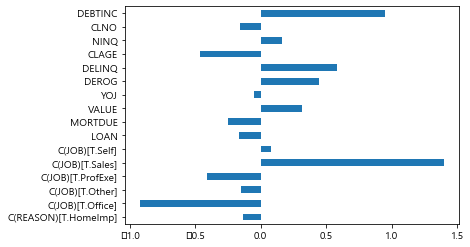

In [30]:
df_log_scaled_coef = pd.DataFrame({"Coef": scaled_log_result.params.values[1:]}, index = scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y = "Coef", legend = False)

In [69]:
df_raw = pd.read_csv("HMEQ.csv")
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [72]:
df_y = df_raw_dummy["BAD"]
df_x = df_raw_dummy.drop("BAD", axis = 1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size = 0.3, random_state = 1234)
print("train data x size: {}".format(df_train_x.shape))
print("train data y size: {}".format(df_train_y.shape))
print("test data x size: {}".format(df_test_x.shape))
print("test data y size: {}".format(df_test_y.shape))

train data x size: (2623, 18)
train data y size: (2623,)
test data x size: (1125, 18)
test data y size: (1125,)


In [73]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.932


In [75]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


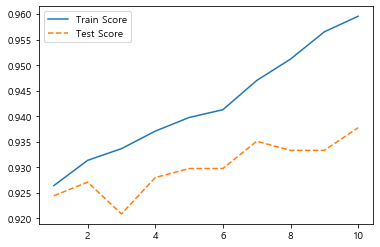

In [76]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [77]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf*2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(max_depth = 4, random_state = 1234,
                                 min_samples_leaf = v_min_samples_leaf,
                                 min_samples_split = 20)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


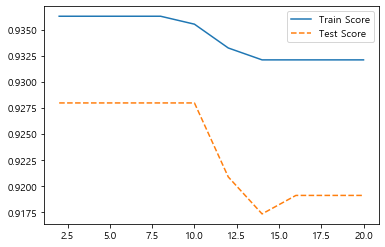

In [78]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [79]:
train_accuracy = []; test_accuracy = []
para_split = [n_split*10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state = 1234,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.979,0.938
1,20,0.966,0.927
2,30,0.955,0.922
3,40,0.950,0.919
4,50,0.950,0.920
5,60,0.949,0.919
6,70,0.946,0.919
7,80,0.945,0.919
8,90,0.945,0.919
9,100,0.944,0.918


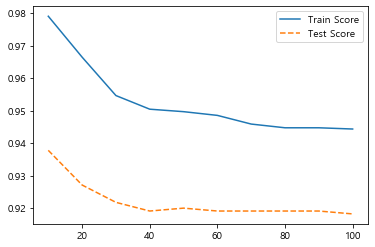

In [80]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [82]:
final_tree = DecisionTreeClassifier(random_state = 1234, max_depth = 4, min_samples_split = 20, min_samples_leaf = 8)
final_tree.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(final_tree.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(final_tree.score(df_test_x, df_test_y)))

Scoring on training set: 0.936
Scoring on test set: 0.928


In [84]:
y_pred =final_tree.predict(df_test_x)
print("Accuracy: {0:.3f}".format(final_tree.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.928
Confusion Matrix: 
[[1015    6]
 [  75   29]]


In [89]:
rf_uncustomized = RandomForestClassifier(random_state = 1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Scoring on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Scoring on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Scoring on training set: 1.000
Scoring on test set: 0.946


In [90]:
train_accuracy = []; test_accuracy = []
para_n_tree = [n_tree*10 for n_tree in range(1, 16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy
0,10,0.992,0.944
1,20,0.999,0.943
2,30,0.999,0.942
3,40,1.000,0.946
4,50,1.000,0.944
5,60,1.000,0.948
6,70,1.000,0.947
7,80,1.000,0.947
8,90,1.000,0.946
9,100,1.000,0.946


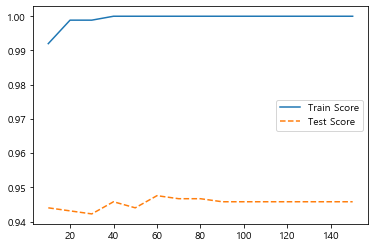

In [91]:
plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_n_tree, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [93]:
oob_error = []

for v_n_estimator in range(1, 151):
    rf = RandomForestClassifier(n_estimators = v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1 - rf.oob_score_)

C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
C:\Users\cptas\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probab

In [ ]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")

In [94]:
train_accuracy = []; test_accuracy = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


In [ ]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split, max_depth = 4, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

In [ ]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_split, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [95]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 10 for n_leaf in range(1, 11)]

for v_min_samples_split in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth = 4, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.927,0.925
1,20,0.927,0.925
2,30,0.927,0.925
3,40,0.927,0.925
4,50,0.927,0.925
5,60,0.927,0.925
6,70,0.927,0.925
7,80,0.927,0.925
8,90,0.927,0.925
9,100,0.927,0.925


In [ ]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_accuracy, linestyle = "--", label = "Test Score")
plt.legend()

In [ ]:
rf_final = RandomForestClassifier(random_state = 1234, n_estimators = 100, max_depth = 4, min_samples_leaf = 20)
rf_final.fit(df_train_x, df_train_y)
y_pred = rf_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))